In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#End of Distribution imputation

In [60]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

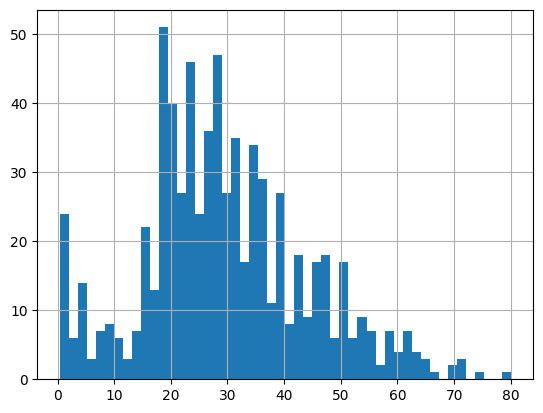

In [61]:
df['Age'].hist(bins=50)

<Axes: ylabel='Age'>

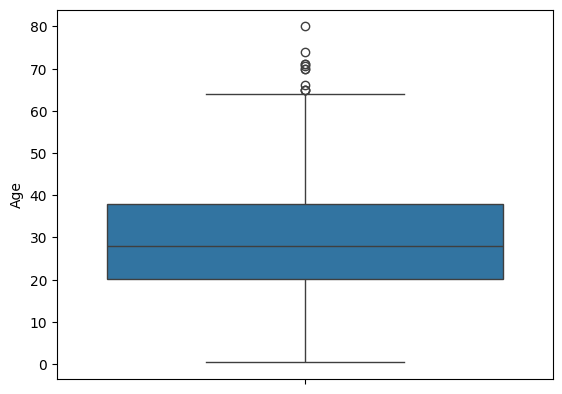

In [62]:
sns.boxplot(df['Age'])

In [63]:
median=df.Age.median()
median

28.0

In [64]:
extremes=df['Age'].mean() + 3*df['Age'].std()
extremes

73.27860964406094

In [65]:
def impute_nan(df,variable,median,extremes):
    df[variable+"_end_distribution"]=df[variable].fillna(extremes)
    df[variable].fillna(median,inplace=True)

In [66]:
impute_nan(df,'Age',df.Age.median(),extremes)

In [67]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [72]:
df['Age'].isnull().sum()

0

<Axes: >

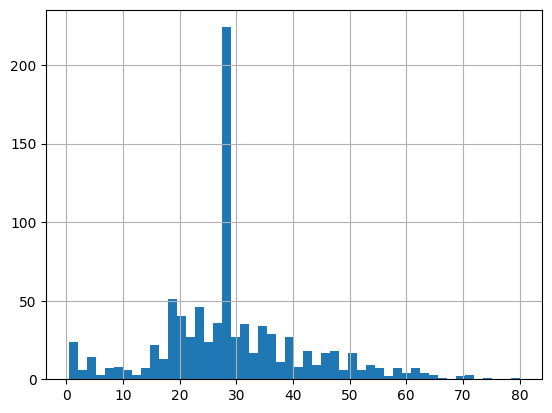

In [68]:
df['Age'].hist(bins=50)

<Axes: >

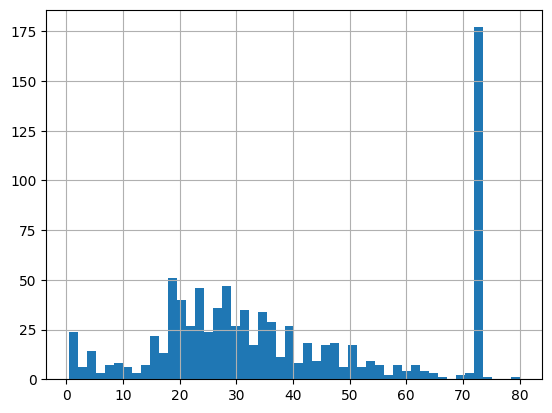

In [69]:
df['Age_end_distribution'].hist(bins=50)

<Axes: ylabel='Age_end_distribution'>

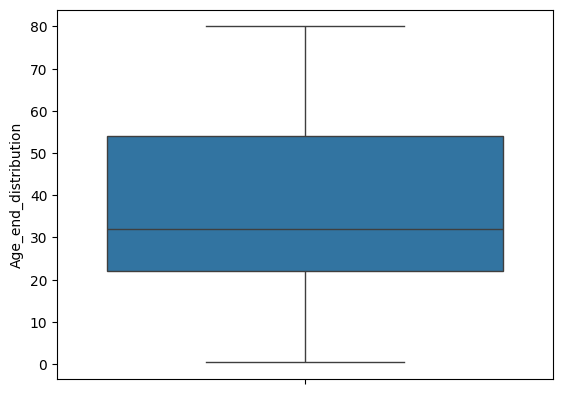

In [71]:
sns.boxplot(df['Age_end_distribution'])

#Advantages : 1.Easy to implement
#2.Captures the importance of miising if there is one.

#Diasdvantages:
#1.Distorts the original disrtibution of variabel.
#2.If number of NA is big it will mask the true outliers.
#3.If number of NA is small,the replaced NA may be considered an outlier and preprocessed in subsequent feature engineering
